In [1]:

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
np.random.seed(42)

n_per_class = 1000
mean0 = [1.5, 1.5]
mean1 = [5.0, 5.0]
cov = [[0.5, 0.0], [0.0, 0.5]]  # variância 0.5 em cada dimensão, sem covariância

X0 = rng.multivariate_normal(mean0, cov, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=n_per_class)

y0 = np.zeros(n_per_class, dtype=int)
y1 = np.ones(n_per_class, dtype=int)

X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])


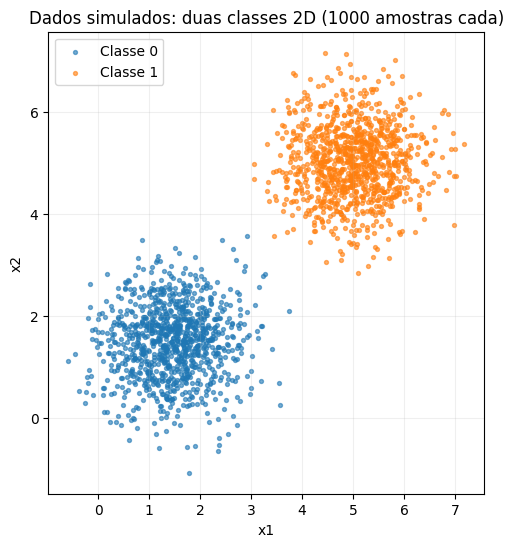

In [2]:
# plot
plt.figure(figsize=(6,6))
plt.scatter(X0[:,0], X0[:,1], s=8, alpha=0.6, label="Classe 0")
plt.scatter(X1[:,0], X1[:,1], s=8, alpha=0.6, label="Classe 1")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Dados simulados: duas classes 2D (1000 amostras cada)")
plt.gca().set_aspect("equal", adjustable="box")
plt.grid(alpha=0.2)
plt.show()

In [3]:
from dataclasses import dataclass, field
## criando perceptron
@dataclass
class Perceptron():
    w : np.ndarray = field(default_factory=lambda: np.array([]))
    b : float = 0.0
    learning_rate : float = 0.05
    random_seed: int = 42
    activation_function : str = 'step'
    training_report : dict = field(default_factory=dict)

    @staticmethod
    def _step(z):
        # vetorizado: retorna 0/1
        return (z >= 0).astype(int)
    
    def _apply_activation(self, z):
        if self.activation_function == 'step':
            return self._step(z)
        else:
            raise ValueError(f"Unknown activation: {self.activation_function}")

    def fit(self, X, y, max_epochs=100):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y)

        self.w = np.random.rand(X.shape[1])
        self.b = 0.0
        self.training_report = {'acuracia' : {}}

        for epoch in range(1, max_epochs+1):
            ## compute predict
            y_ = self.predict(X)

            ## compute error
            error = y - y_

            ## update weights 
            self.w += self.learning_rate * np.dot(error, X)
            self.b += self.learning_rate * np.sum(error)
            
            acc = float(np.mean(y_==y))
            self.training_report['acuracia'][epoch] = acc
            if acc == 1:
                break

    def predict(self, X):
        z = np.dot(X, self.w)
        return self._apply_activation(z + self.b)


In [4]:
model = Perceptron()
model.fit(X, y)

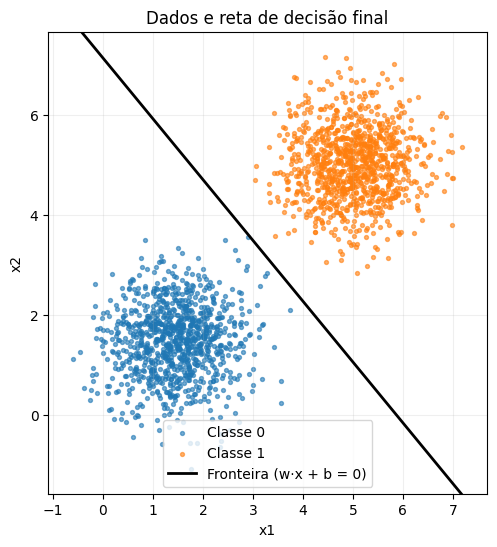

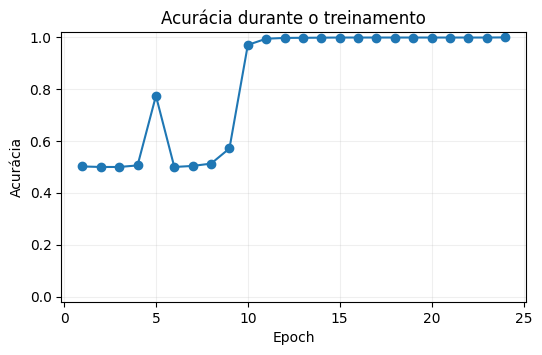

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# parâmetros do modelo treinado
w = model.w
b = model.b

# 1) Plot dos dados + reta de decisão
plt.figure(figsize=(6,6))
plt.scatter(X0[:,0], X0[:,1], s=8, alpha=0.6, label="Classe 0")
plt.scatter(X1[:,0], X1[:,1], s=8, alpha=0.6, label="Classe 1")

# intervalo para x
xmin, xmax = X[:,0].min() - 0.5, X[:,0].max() + 0.5

if abs(w[1]) > 1e-8:
    xs = np.linspace(xmin, xmax, 200)
    ys = -(w[0] * xs + b) / w[1]
    plt.plot(xs, ys, color='k', lw=2, label='Fronteira (w·x + b = 0)')
else:
    # caso w[1] ≈ 0, reta vertical
    x_vert = -b / (w[0] if abs(w[0])>1e-8 else 1e-8)
    plt.axvline(x=x_vert, color='k', lw=2, label='Fronteira vertical')

plt.xlim(xmin, xmax)
plt.ylim(X[:,1].min() - 0.5, X[:,1].max() + 0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Dados e reta de decisão final")
plt.legend()
plt.grid(alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

# 2) Plot da acurácia ao longo das épocas
acc_dict = model.training_report.get('acuracia', {})
if len(acc_dict) == 0:
    print("Nenhum relatório de treinamento encontrado em model.training_report['acuracia'].")
else:
    epochs = np.array(sorted(acc_dict.keys()))
    accs = np.array([acc_dict[e] for e in epochs])

    plt.figure(figsize=(6,3.5))
    plt.plot(epochs, accs, marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Acurácia")
    plt.ylim(-0.02, 1.02)
    plt.title("Acurácia durante o treinamento")
    plt.grid(alpha=0.2)
    plt.show()

In [6]:
print(model.w, model.b)

[36.02015838 29.6154014 ] -211.4000000000001


Como apresentado acima, foi possivel convergir para um resultado antes do limite de 100 epocas. Isso ocorre porque as duas nuvens de dados são linearmente separaveis.

In [7]:

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)
np.random.seed(42)

n_per_class = 1000
mean0 = [3.0, 3.0]
mean1 = [4.0, 4.0]
cov = [[1.5, 0.0], [0.0, 1.5]]  # variância 0.5 em cada dimensão, sem covariância

X0 = rng.multivariate_normal(mean0, cov, size=n_per_class)
X1 = rng.multivariate_normal(mean1, cov, size=n_per_class)

y0 = np.zeros(n_per_class, dtype=int)
y1 = np.ones(n_per_class, dtype=int)

X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])


In [8]:
model = Perceptron(learning_rate=0.01)
model.fit(X, y)

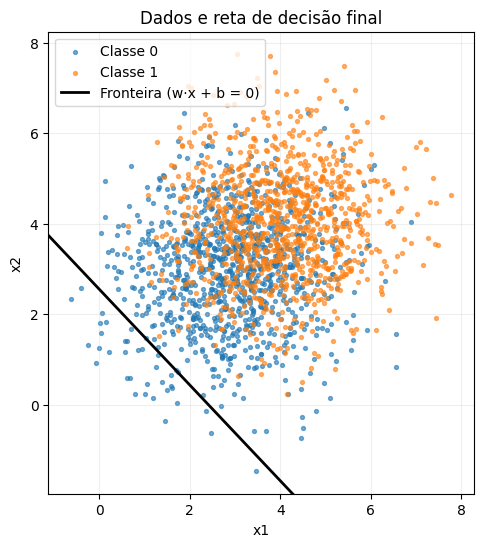

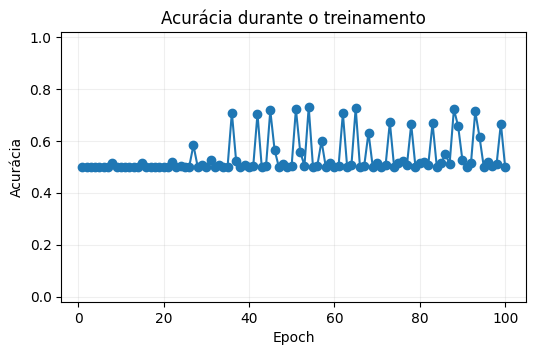

In [9]:
# ...existing code...
# Adicionar nova célula abaixo de: model = Perceptron(); model.fit(X, y)

import numpy as np
import matplotlib.pyplot as plt

# parâmetros do modelo treinado
w = model.w
b = model.b

# 1) Plot dos dados + reta de decisão
plt.figure(figsize=(6,6))
plt.scatter(X0[:,0], X0[:,1], s=8, alpha=0.6, label="Classe 0")
plt.scatter(X1[:,0], X1[:,1], s=8, alpha=0.6, label="Classe 1")

# intervalo para x
xmin, xmax = X[:,0].min() - 0.5, X[:,0].max() + 0.5

if abs(w[1]) > 1e-8:
    xs = np.linspace(xmin, xmax, 200)
    ys = -(w[0] * xs + b) / w[1]
    plt.plot(xs, ys, color='k', lw=2, label='Fronteira (w·x + b = 0)')
else:
    # caso w[1] ≈ 0, reta vertical
    x_vert = -b / (w[0] if abs(w[0])>1e-8 else 1e-8)
    plt.axvline(x=x_vert, color='k', lw=2, label='Fronteira vertical')

plt.xlim(xmin, xmax)
plt.ylim(X[:,1].min() - 0.5, X[:,1].max() + 0.5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Dados e reta de decisão final")
plt.legend()
plt.grid(alpha=0.2)
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

# 2) Plot da acurácia ao longo das épocas
acc_dict = model.training_report.get('acuracia', {})
if len(acc_dict) == 0:
    print("Nenhum relatório de treinamento encontrado em model.training_report['acuracia'].")
else:
    epochs = np.array(sorted(acc_dict.keys()))
    accs = np.array([acc_dict[e] for e in epochs])

    plt.figure(figsize=(6,3.5))
    plt.plot(epochs, accs, marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Acurácia")
    plt.ylim(-0.02, 1.02)
    plt.title("Acurácia durante o treinamento")
    plt.grid(alpha=0.2)
    plt.show()

Já nesse caso existe uma grande sobreposição entre as classes, de modo que a rede neural até consegue classificar corretamente alguns dados da classe 0 (se ele chuta que é classe 0 ele acerta sempre) mas tem uma grande taxa de erro para a classe 1, já que a maioria dos dados da classe 0 está do lado "errado" da reta  traçada.